# AI Lab Assignment: Data Preprocessing & Visualization

## Scenario (Requirement)
You are a data scientist at DaciaVision Analytics, a firm specializing in data-driven insights for the film industry. Your team has received a raw dataset containing the
Top 1000 Movies from IMDb. However, the dataset is far from perfect — it contains missing values, inconsistencies, and outliers that need to be handled before any
meaningful insights can be extracted.

Given dataset: https://raw.githubusercontent.com/krishna-koly/IMDB_TOP_1000/refs/heads/main/imdb_top_1000.csv


Let us first import essential libraries that will help us explore and analyze the dataset.
- `pandas` for data manipulation.
- `matplotlib` & `seaborn` for data visualization.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Let's load the **Top 1000 Movies from IMDb** dataset. Since it's stored online, we use pd.read_csv() to read it directly from the URL.

In [2]:
url = "https://raw.githubusercontent.com/krishna-koly/IMDB_TOP_1000/refs/heads/main/imdb_top_1000.csv"
df = pd.read_csv(url)

Understanding the structure of the dataset is key before diving into analysis. Let's:
- Check the data types of each column.
- Count non-null values.
- Look at the first few rows.

In [3]:
print("Dataset Overview:")
print(df.info())
print("\nFirst 5 rows:")
print(df.head())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB
None

First 5 rows:

A quick glance at summary statistics helps us understand numerical distributions, potential outliers, and missing values.

In [4]:
print("\nSummary Statistics:")
print(df.describe())
print("\nMissing Values:")
print(df.isnull().sum())


Summary Statistics:
       IMDB_Rating  Meta_score   No_of_Votes
count  1000.000000  843.000000  1.000000e+03
mean      7.949300   77.971530  2.736929e+05
std       0.275491   12.376099  3.273727e+05
min       7.600000   28.000000  2.508800e+04
25%       7.700000   70.000000  5.552625e+04
50%       7.900000   79.000000  1.385485e+05
75%       8.100000   87.000000  3.741612e+05
max       9.300000  100.000000  2.343110e+06

Missing Values:
Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64


## Data Preprocessing Pipeline

## Step 1 : *Data Cleaning*

### 1.1. Dropping duplicates

In [5]:
print(df.shape)
df = df.drop_duplicates()
print(df.shape)

(1000, 16)
(1000, 16)


We can see that we did not have any duplicates, but it is a good practice to check for any duplicates, because the dataset is quite big.

### 1.2. Identifying and fixing inconsistencies in categorical and numerical data.
We can notice that the column: **Released_Year** are represented as objects in the dataset, but they *are actually integers, if we look in the csv file*. This means we have some inconsistencies (unwanted values).
So we force the previously mentioned column to have integer values, by applying some formatting, and fill the incosistent values NaN. (we will take care of these later) 

This will help us in the recommender system and also in adressing outliners (1.2.) and  in 1.4..

After running the cell, please run one more time the 3rd code cell from this file and notice that Released_Year is now **an integer**.

In [6]:
#transform nonconvertable numeric values to NaN 
df['Released_Year'] = pd.to_numeric(df['Released_Year'], errors='coerce')

# FORMATTING : Convert the column to int
df['Released_Year'] = df['Released_Year'].astype('Int32')

df[df['Released_Year'].isna()]


,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
966,https://m.media-amazon.com/images/M/MV5BNjEzYj...,Apollo 13,<NA>,U,140 min,"Adventure, Drama, History",7.6,NASA must devise a strategy to return Apollo 1...,77.0,Ron Howard,Tom Hanks,Bill Paxton,Kevin Bacon,Gary Sinise,269197,"173,837,933"


Notice also in the summary that we have now 1 NaN in the Released_Year column.

We can notice that also the column **Runtime** can be formatted 
(for example : 123 min -> 123)
- we apply the same 3 code lines as before (being careful to inconsistencies , but the aim is now to remove ' min' from the string)
- after running the cell, please run one more time the 3rd code cell from this file and notice that Runtime is now **an integer**.

In [7]:
df['Runtime'] = pd.to_numeric(
    df['Runtime'].astype(str).str.replace(' min', '', regex=False),
    errors='coerce'
)

df['Runtime'] = df['Runtime'].astype('Int32')

df[df['Runtime'].isna()]


,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross


The column **Gross** can be formatted from string to integer: ( "1,233,333" -> 1.233.333) 

In [8]:

df['Gross'] = df['Gross'].astype(str).str.replace(',', '')
df['Gross'] = pd.to_numeric(df['Gross'], errors='coerce')

# FORMATTING : Convert the column to int
df['Gross'] = df['Gross'].astype('Int32')

df[df['Gross'].isna()]



,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
18,https://m.media-amazon.com/images/M/MV5BNjViNW...,Hamilton,2020,PG-13,160,"Biography, Drama, History",8.6,The real life of one of America's foremost fou...,90.0,Thomas Kail,Lin-Manuel Miranda,Phillipa Soo,Leslie Odom Jr.,Rene Elise Goldsberry,55291,<NA>
20,https://m.media-amazon.com/images/M/MV5BOTc2ZT...,Soorarai Pottru,2020,U,153,Drama,8.6,"Nedumaaran Rajangam ""Maara"" sets out to make t...",NaN,Sudha Kongara,Suriya,Madhavan,Paresh Rawal,Aparna Balamurali,54995,<NA>
30,https://m.media-amazon.com/images/M/MV5BYjBmYT...,Seppuku,1962,NaN,133,"Action, Drama, Mystery",8.6,When a ronin requesting seppuku at a feudal lo...,85.0,Masaki Kobayashi,Tatsuya Nakadai,Akira Ishihama,Shima Iwashita,Tetsur Tanba,42004,<NA>
32,https://m.media-amazon.com/images/M/MV5BZjc4ND...,It's a Wonderful Life,1946,PG,130,"Drama, Family, Fantasy",8.6,An angel is sent from Heaven to help a despera...,89.0,Frank Capra,James Stewart,Donna Reed,Lionel Barrymore,Thomas Mitchell,405801,<NA>
46,https://m.media-amazon.com/images/M/MV5BZmY2Nj...,Hotaru no haka,1988,U,89,"Animation, Drama, War",8.5,A young boy and his little sister struggle to ...,94.0,Isao Takahata,Tsutomu Tatsumi,Ayano Shiraishi,Akemi Yamaguchi,Yoshiko Shinohara,235231,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,https://m.media-amazon.com/images/M/MV5BYTE4YW...,Blowup,1966,A,111,"Drama, Mystery, Thriller",7.6,A fashion photographer unknowingly captures a ...,82.0,Michelangelo Antonioni,David Hemmings,Vanessa Redgrave,Sarah Miles,John Castle,56513,<NA>
995,https://m.media-amazon.com/images/M/MV5BNGEwMT...,Breakfast at Tiffany's,1961,A,115,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,<NA>
996,https://m.media-amazon.com/images/M/MV5BODk3Yj...,Giant,1956,G,201,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,<NA>
998,https://m.media-amazon.com/images/M/MV5BZTBmMj...,Lifeboat,1944,NaN,97,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,<NA>


For the last 2 nonnumerical features we were lucky : we did not have any nonconvertable row

Now our dataset looks better : we managed to transform some strings into integers and we can now work with the numbers in our favour.

In [9]:
df.head(10)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000
5,https://m.media-amazon.com/images/M/MV5BNzA5ZD...,The Lord of the Rings: The Return of the King,2003,U,201,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,377845905
6,https://m.media-amazon.com/images/M/MV5BNGNhMD...,Pulp Fiction,1994,A,154,"Crime, Drama",8.9,"The lives of two mob hitmen, a boxer, a gangst...",94.0,Quentin Tarantino,John Travolta,Uma Thurman,Samuel L. Jackson,Bruce Willis,1826188,107928762
7,https://m.media-amazon.com/images/M/MV5BNDE4OT...,Schindler's List,1993,A,195,"Biography, Drama, History",8.9,"In German-occupied Poland during World War II,...",94.0,Steven Spielberg,Liam Neeson,Ralph Fiennes,Ben Kingsley,Caroline Goodall,1213505,96898818
8,https://m.media-amazon.com/images/M/MV5BMjAxMz...,Inception,2010,UA,148,"Action, Adventure, Sci-Fi",8.8,A thief who steals corporate secrets through t...,74.0,Christopher Nolan,Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,Ken Watanabe,2067042,292576195
9,https://m.media-amazon.com/images/M/MV5BMmEzNT...,Fight Club,1999,A,139,Drama,8.8,An insomniac office worker and a devil-may-car...,66.0,David Fincher,Brad Pitt,Edward Norton,Meat Loaf,Zach Grenier,1854740,37030102


We can also notice in the dataset that **Certificate** has values that are not available in the next category:


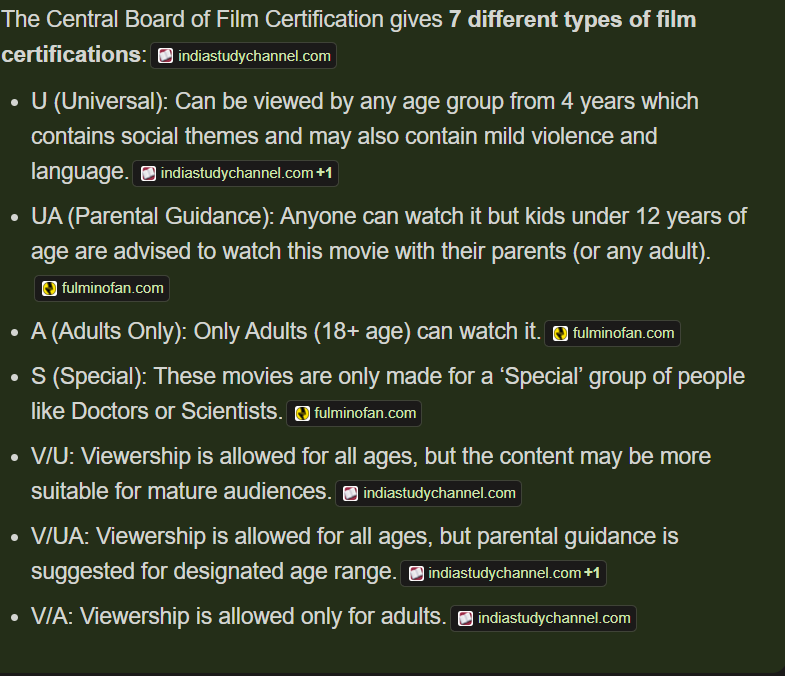

So let us replace them with Nan for now, as we will deal with Nan later in the Data Cleaning process.

In [10]:
import numpy as np

valid_certificates = ['U', 'V/U', 'UA', 'V/UA', 'A', 'V/A', 'S']

df.loc[~df['Certificate'].isin(valid_certificates), 'Certificate'] = np.nan


### 1.3. Detecting and addressing outliers. 

From the summary statistics, we can notice that **Released_Year, Runtime, IMDB_Rating and Meta_score** are in the correct range (by looking at max and min values), so they do not have outliers.

Interquartile Range (IQR) is a statistical measure that describes the *spread of the middle 50% of the data*.
We can use it to drop the outliers from our dataset.

*!!! We can do this only for numerical values !!!*
- No_of_votes and Gross features have really big values, so we are not able to detect outliers. The best choice would be to use IQR and keep the movies that remain after applying the transformation.

In [11]:
possible_outliner_features = ["No_of_Votes", "Gross"]

mask = pd.Series(True, index=df.index)

for feature in possible_outliner_features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    mask &= df[feature].between(lower_bound, upper_bound)

df = df[mask]
print(df.shape)

(705, 16)


We have successfully dropped some outliners.

### 1.4. Handling missing values using at least two different strategies + explaining which one makes more sense in the current scenario. 

From *Missing Values Statistics*, we can see that only **Certificate, Meta_score, Gross** have Nan values (they are missing)
, so these are the features we are interested to fill in.

**Case 1.** Replace all missing numerical values (NaN) with minimum 
and for others pick a value that seems to be "the average"

### DO NOT RUN THIS

In [12]:
df["Certificate"].fillna('A', inplace=True)
df["Meta_score"].fillna(df["Meta_score"].min(), inplace=True)
df["Gross"].fillna(df["Gross"].min(), inplace=True)
df["Released_Year"].fillna(1970, inplace=True) # this row contains only one NaN , if the corresponding row(movie) has not been removed in the last step

print(df.isna().sum())
print(df.shape)

Poster_Link      0
Series_Title     0
Released_Year    0
Certificate      0
Runtime          0
Genre            0
IMDB_Rating      0
Overview         0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
dtype: int64
(705, 16)


This does not make so much sense in the current scenario, because:
- Meta_score ranges from 45 to 100
- Gross ranges from 1305.0 to 191796233.0
- Certificate and Released_Year are picked by intuition, not using actual statistics and computations (not so reliable in practice)

So, in this case, especially considering the columns that had a lot of NaNs at the beginning, like Certificate or Meta_score, the dataset would become unreliable.

**Case 2.** 
- Replace all missing values (NaN) with mean (for numerical values). 
- For strings(Certificate Column) -> we could use some data specific knowledge and, if we want to be safe and not fill in certificates that maybe result in movies for Adults (18+) being recommended to people under 18 years old, just replace the Nans with 'A':

### DO NOT RUN THIS

In [24]:
df["Certificate"].fillna('A', inplace=True)
df["Meta_score"].fillna(df["Meta_score"].median(), inplace=True)
df["Gross"].fillna(df["Gross"].median(), inplace=True)
df["Released_Year"].fillna(df["Released_Year"].median(), inplace=True) # this row contains only one NaN , if the corresponding row(movie) has not been removed in the last step

print(df.isna().sum())
print(df.shape)

Poster_Link      0
Series_Title     0
Released_Year    0
Certificate      0
Runtime          0
Genre            0
IMDB_Rating      0
Overview         0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
dtype: int64
(611, 16)


**Case 3.** 
- Replace all missing values (NaN) with mean (for numerical values). 
- For strings(Certificate Column) -> we could replace with the string with the most occurences (more commonly accepted, minimize bias)

In [12]:
df['Certificate'].fillna(df['Certificate'].mode()[0], inplace=True)
df["Meta_score"].fillna(df["Meta_score"].median(), inplace=True)
df["Gross"].fillna(df["Gross"].median(), inplace=True)
df["Released_Year"].fillna(df["Released_Year"].median(), inplace=True) # this row contains only one NaN , if the corresponding row(movie) 
# has not been removed in the last step

print(df.isna().sum())
print(df.shape)

Poster_Link      0
Series_Title     0
Released_Year    0
Certificate      0
Runtime          0
Genre            0
IMDB_Rating      0
Overview         0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
dtype: int64
(705, 16)


Of course, this last replacement works under the assumption of **MCAR** (Missing Completely At Random), because we need proper domain knowledge if the missing of some values is independent or is actually corelated to something else

## Step 2 : *Data Transformation*

### 2.1. Normalize or standardize numerical features where necessary. 
### Perform feature scaling and explain its necessity in different scenarios.

This step is important because:
- we have features which are in a wide range, the range of every feature being different (see more details in 1.4. case 1)
- we have to make them matter the same to the eventual ML model
- prevent numerical instability
- normal distribution assumption

Here I made some copies that we will need for the plot in a dataset copy (we need unstandardized data -> we can draw insights better this way).
Certificate and Genre column are not encoded yet, so we will save them in the dataset copy after encoding.

In [13]:

df_plot = pd.DataFrame()
df_plot['Series_Title_plot'] = df['Series_Title']
df_plot['Released_Year_plot'] = df['Released_Year'] # certificate copy, genres copies

df_plot['Runtime_plot'] = df['Runtime']
df_plot['IMDB_Rating_plot'] = df['IMDB_Rating']
df_plot['Overview']=df['Overview']

df_plot['Meta_score_plot'] = df['Meta_score']
df_plot['Director_plot'] = df['Director']
df_plot['Star1_plot'] = df['Star1']
df_plot['Star2_plot'] = df['Star2']
df_plot['Star3_plot'] = df['Star3']
df_plot['Star4_plot'] = df['Star4']

df_plot['No_of_Votes_plot'] = df['No_of_Votes']
df_plot['Gross_plot'] = df['Gross']

In [14]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()

df["Released_Year"] = standard_scaler.fit_transform(df[["Released_Year"]])
df["Runtime"] = standard_scaler.fit_transform(df[["Runtime"]])
df["IMDB_Rating"] = standard_scaler.fit_transform(df[["IMDB_Rating"]])
df["Meta_score"] = standard_scaler.fit_transform(df[["Meta_score"]])
df["No_of_Votes"] = standard_scaler.fit_transform(df[["No_of_Votes"]])
df["Gross"] = standard_scaler.fit_transform(df[["Gross"]])

df.head(10)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,-1.614583,U,-0.985624,"Crime, Drama",4.592377,A jury holdout attempts to prevent a miscarria...,1.543382,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,2.463019,-0.672064
12,https://m.media-amazon.com/images/M/MV5BOTQ5ND...,"Il buono, il brutto, il cattivo",-1.203222,A,1.412753,Western,3.750561,A bounty hunting scam joins two men in an unea...,1.043190,Sergio Leone,Clint Eastwood,Eli Wallach,Lee Van Cleef,Aldo Giuffr,2.455505,-0.632888
19,https://m.media-amazon.com/images/M/MV5BYWZjMj...,Gisaengchung,1.219236,A,0.342708,"Comedy, Drama, Thriller",2.908744,Greed and class discrimination threaten the ne...,1.543382,Bong Joon Ho,Kang-ho Song,Lee Sun-kyun,Cho Yeo-jeong,Choi Woo-sik,1.755130,0.431357
22,https://m.media-amazon.com/images/M/MV5BOTMwYj...,Cidade de Deus,0.442221,A,0.268911,"Crime, Drama",2.908744,"In the slums of Rio, two kids' paths diverge a...",0.126171,Fernando Meirelles,Ktia Lund,Alexandre Rodrigues,Leandro Firmino,Matheus Nachtergaele,2.511623,-0.599939
23,https://m.media-amazon.com/images/M/MV5BMjlmZm...,Sen to Chihiro no kamikakushi,0.396514,U,0.084421,"Animation, Adventure, Family",2.908744,"During her family's move to the suburbs, a sul...",1.543382,Hayao Miyazaki,Daveigh Chase,Suzanne Pleshette,Miyu Irino,Rumi Hiiragi,2.264344,-0.543821
26,https://m.media-amazon.com/images/M/MV5BYmJmM2...,La vita  bella,0.213687,U,-0.247662,"Comedy, Drama, Romance",2.908744,When an open-minded Jewish librarian and his s...,-1.541135,Roberto Benigni,Roberto Benigni,Nicoletta Braschi,Giorgio Cantarini,Giustino Durano,2.121044,0.526605
31,https://m.media-amazon.com/images/M/MV5BOWE4ZD...,Shichinin no samurai,-1.751703,U,3.110066,"Action, Adventure, Drama",2.908744,A poor village under attack by bandits recruit...,1.710112,Akira Kurosawa,Toshir Mifune,Takashi Shimura,Keiko Tsushima,Yukiko Shimazaki,0.530956,-0.764172
34,https://m.media-amazon.com/images/M/MV5BOTA5ND...,Whiplash,0.990702,A,-0.616643,"Drama, Music",2.487836,A promising young drummer enrolls at a cut-thr...,0.876459,Damien Chazelle,Miles Teller,J.K. Simmons,Melissa Benoist,Paul Reiser,2.606284,-0.475461
35,https://m.media-amazon.com/images/M/MV5BMTYxND...,The Intouchables,0.853582,UA,-0.395255,"Biography, Comedy, Drama",2.487836,After he becomes a quadriplegic from a paragli...,-1.707866,Olivier Nakache,ric Toledano,Franois Cluzet,Omar Sy,Anne Le Ny,2.827198,-0.473429
38,https://m.media-amazon.com/images/M/MV5BOWRiZD...,The Pianist,0.442221,U,1.006873,"Biography, Drama, Music",2.487836,A Polish Jewish musician struggles to survive ...,0.626363,Roman Polanski,Adrien Brody,Thomas Kretschmann,Frank Finlay,Emilia Fox,2.668352,-0.036852


This *standardization* is the best because we have a lot of values for which calculations of distances and approximations will be made, so, numerically, we have an advantage. 
  

In the case of *MinMax*, having a lot of films (rows), 
we will get values that are really close to eachother, in the interval [0,1], resulting in inefficient calculations later on, for our simple recommender system or for a simple ML model.

For example, if we have [0.0210, 0.0211, 0.212,...], **the calculations will not be able to approximate exactly how the model will look like**.
However, if we were to deal with image data or CNNs (where special activation functions are used - they need small, consistent range), *MinMax* would be more helpful.

### DO NOT RUN THIS

In [22]:
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()

df["Released_Year"] = minmax_scaler.fit_transform(df[["Released_Year"]])
df["Runtime"] = minmax_scaler.fit_transform(df[["Runtime"]])
df["IMDB_Rating"] = minmax_scaler.fit_transform(df[["IMDB_Rating"]])
df["Meta_score"] = minmax_scaler.fit_transform(df[["Meta_score"]])
df["No_of_Votes"] = minmax_scaler.fit_transform(df[["No_of_Votes"]])
df["Gross"] = minmax_scaler.fit_transform(df[["Gross"]])

df.head(10)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
17,https://m.media-amazon.com/images/M/MV5BZjA0OW...,One Flew Over the Cuckoo's Nest,0.521739,A,0.529915,[Drama],1.000000,A criminal pleads insanity and is admitted to ...,0.690909,Milos Forman,...,0,0,0,0,0,0,0,0,0,0
19,https://m.media-amazon.com/images/M/MV5BYWZjMj...,Gisaengchung,1.000000,A,0.521368,"[Comedy, Drama, Thriller]",0.909091,Greed and class discrimination threaten the ne...,0.927273,Bong Joon Ho,...,0,0,0,0,0,0,0,1,0,0
22,https://m.media-amazon.com/images/M/MV5BOTMwYj...,Cidade de Deus,0.815217,A,0.504274,"[Crime, Drama]",0.909091,"In the slums of Rio, two kids' paths diverge a...",0.618182,Fernando Meirelles,...,0,0,0,0,0,0,0,0,0,0
23,https://m.media-amazon.com/images/M/MV5BMjlmZm...,Sen to Chihiro no kamikakushi,0.804348,U,0.461538,"[Animation, Adventure, Family]",0.909091,"During her family's move to the suburbs, a sul...",0.927273,Hayao Miyazaki,...,0,0,0,0,0,0,0,0,0,0
26,https://m.media-amazon.com/images/M/MV5BYmJmM2...,La vita  bella,0.760870,U,0.384615,"[Comedy, Drama, Romance]",0.909091,When an open-minded Jewish librarian and his s...,0.254545,Roberto Benigni,...,0,0,0,0,1,0,0,0,0,0
34,https://m.media-amazon.com/images/M/MV5BOTA5ND...,Whiplash,0.945652,A,0.299145,"[Drama, Music]",0.818182,A promising young drummer enrolls at a cut-thr...,0.781818,Damien Chazelle,...,0,1,0,0,0,0,0,0,0,0
35,https://m.media-amazon.com/images/M/MV5BMTYxND...,The Intouchables,0.913043,UA,0.350427,"[Biography, Comedy, Drama]",0.818182,After he becomes a quadriplegic from a paragli...,0.218182,Olivier Nakache,...,0,0,0,0,0,0,0,0,0,0
38,https://m.media-amazon.com/images/M/MV5BOWRiZD...,The Pianist,0.815217,R,0.675214,"[Biography, Drama, Music]",0.818182,A Polish Jewish musician struggles to survive ...,0.727273,Roman Polanski,...,0,1,0,0,0,0,0,0,0,0
45,https://m.media-amazon.com/images/M/MV5BM2FhYj...,Nuovo Cinema Paradiso,0.663043,U,0.717949,"[Drama, Romance]",0.818182,A filmmaker recalls his childhood when falling...,0.636364,Giuseppe Tornatore,...,0,0,0,0,1,0,0,0,0,0
48,https://m.media-amazon.com/images/M/MV5BZGI5Mj...,Once Upon a Time in the West,0.445652,U,0.803419,[Western],0.818182,A mysterious stranger with a harmonica joins f...,0.636364,Sergio Leone,...,0,0,0,0,0,0,0,0,0,1


### 2.2. Encode categorical variables using appropriate encoding techniques (one-hot, label encoding, etc.).

- One-hot encoding the *Genre* column : the values are **categorical** (Biography, Drama, History etc...)
- by using **MultiLabelBinarizer from sklearn**, we can create a dataframe and join it after the last column

In [15]:
df['Genre'] = df['Genre'].astype(str).str.split(', ') #split the genres into lists

from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
genre_encoded = pd.DataFrame(mlb.fit_transform(df['Genre']), columns=mlb.classes_, index=df.index)

df = pd.concat([df, genre_encoded], axis=1) # join the created dataframe block


df.head(10)



,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,-1.614583,U,-0.985624,"[Crime, Drama]",4.592377,A jury holdout attempts to prevent a miscarria...,1.543382,Sidney Lumet,...,0,0,0,0,0,0,0,0,0,0
12,https://m.media-amazon.com/images/M/MV5BOTQ5ND...,"Il buono, il brutto, il cattivo",-1.203222,A,1.412753,[Western],3.750561,A bounty hunting scam joins two men in an unea...,1.043190,Sergio Leone,...,0,0,0,0,0,0,0,0,0,1
19,https://m.media-amazon.com/images/M/MV5BYWZjMj...,Gisaengchung,1.219236,A,0.342708,"[Comedy, Drama, Thriller]",2.908744,Greed and class discrimination threaten the ne...,1.543382,Bong Joon Ho,...,0,0,0,0,0,0,0,1,0,0
22,https://m.media-amazon.com/images/M/MV5BOTMwYj...,Cidade de Deus,0.442221,A,0.268911,"[Crime, Drama]",2.908744,"In the slums of Rio, two kids' paths diverge a...",0.126171,Fernando Meirelles,...,0,0,0,0,0,0,0,0,0,0
23,https://m.media-amazon.com/images/M/MV5BMjlmZm...,Sen to Chihiro no kamikakushi,0.396514,U,0.084421,"[Animation, Adventure, Family]",2.908744,"During her family's move to the suburbs, a sul...",1.543382,Hayao Miyazaki,...,0,0,0,0,0,0,0,0,0,0
26,https://m.media-amazon.com/images/M/MV5BYmJmM2...,La vita  bella,0.213687,U,-0.247662,"[Comedy, Drama, Romance]",2.908744,When an open-minded Jewish librarian and his s...,-1.541135,Roberto Benigni,...,0,0,0,0,1,0,0,0,0,0
31,https://m.media-amazon.com/images/M/MV5BOWE4ZD...,Shichinin no samurai,-1.751703,U,3.110066,"[Action, Adventure, Drama]",2.908744,A poor village under attack by bandits recruit...,1.710112,Akira Kurosawa,...,0,0,0,0,0,0,0,0,0,0
34,https://m.media-amazon.com/images/M/MV5BOTA5ND...,Whiplash,0.990702,A,-0.616643,"[Drama, Music]",2.487836,A promising young drummer enrolls at a cut-thr...,0.876459,Damien Chazelle,...,0,1,0,0,0,0,0,0,0,0
35,https://m.media-amazon.com/images/M/MV5BMTYxND...,The Intouchables,0.853582,UA,-0.395255,"[Biography, Comedy, Drama]",2.487836,After he becomes a quadriplegic from a paragli...,-1.707866,Olivier Nakache,...,0,0,0,0,0,0,0,0,0,0
38,https://m.media-amazon.com/images/M/MV5BOWRiZD...,The Pianist,0.442221,U,1.006873,"[Biography, Drama, Music]",2.487836,A Polish Jewish musician struggles to survive ...,0.626363,Roman Polanski,...,0,1,0,0,0,0,0,0,0,0


The one-hot encoding worked: we have the genres as separate columns.

In [16]:
print(df.isna().sum())
print(df.shape)

Poster_Link      0
Series_Title     0
Released_Year    0
Certificate      0
Runtime          0
Genre            0
IMDB_Rating      0
Overview         0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
Action           0
Adventure        0
Animation        0
Biography        0
Comedy           0
Crime            0
Drama            0
Family           0
Fantasy          0
Film-Noir        0
History          0
Horror           0
Music            0
Musical          0
Mystery          0
Romance          0
Sci-Fi           0
Sport            0
Thriller         0
War              0
Western          0
dtype: int64
(705, 37)


We did not introduce any NaN values, which is good.
**The disadvantage is that we have introduces 21 additional columns.**

Let us at least remove the Genre column, as we have its values one-hot encoded.

In [17]:
df = df.drop(columns=['Genre'])
print(df.shape)

(705, 36)


- Encoding labeling the *Certificate* column : the values correspond to numbers and respect an order (U -> 0, UA -> 1, A -> 2, S -> 4, etc...)

In [18]:
df['Certificate'] = df['Certificate'].replace({
    'U': 0,
    'V/U': 0,
    'UA': 1,
    'V/UA': 1,
    'A': 2,
    'V/A': 2,
    'S': 3
})

In [19]:
df.head(20)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,IMDB_Rating,Overview,Meta_score,Director,Star1,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,-1.614583,0,-0.985624,4.592377,A jury holdout attempts to prevent a miscarria...,1.543382,Sidney Lumet,Henry Fonda,...,0,0,0,0,0,0,0,0,0,0
12,https://m.media-amazon.com/images/M/MV5BOTQ5ND...,"Il buono, il brutto, il cattivo",-1.203222,2,1.412753,3.750561,A bounty hunting scam joins two men in an unea...,1.043190,Sergio Leone,Clint Eastwood,...,0,0,0,0,0,0,0,0,0,1
19,https://m.media-amazon.com/images/M/MV5BYWZjMj...,Gisaengchung,1.219236,2,0.342708,2.908744,Greed and class discrimination threaten the ne...,1.543382,Bong Joon Ho,Kang-ho Song,...,0,0,0,0,0,0,0,1,0,0
22,https://m.media-amazon.com/images/M/MV5BOTMwYj...,Cidade de Deus,0.442221,2,0.268911,2.908744,"In the slums of Rio, two kids' paths diverge a...",0.126171,Fernando Meirelles,Ktia Lund,...,0,0,0,0,0,0,0,0,0,0
23,https://m.media-amazon.com/images/M/MV5BMjlmZm...,Sen to Chihiro no kamikakushi,0.396514,0,0.084421,2.908744,"During her family's move to the suburbs, a sul...",1.543382,Hayao Miyazaki,Daveigh Chase,...,0,0,0,0,0,0,0,0,0,0
26,https://m.media-amazon.com/images/M/MV5BYmJmM2...,La vita  bella,0.213687,0,-0.247662,2.908744,When an open-minded Jewish librarian and his s...,-1.541135,Roberto Benigni,Roberto Benigni,...,0,0,0,0,1,0,0,0,0,0
31,https://m.media-amazon.com/images/M/MV5BOWE4ZD...,Shichinin no samurai,-1.751703,0,3.110066,2.908744,A poor village under attack by bandits recruit...,1.710112,Akira Kurosawa,Toshir Mifune,...,0,0,0,0,0,0,0,0,0,0
34,https://m.media-amazon.com/images/M/MV5BOTA5ND...,Whiplash,0.990702,2,-0.616643,2.487836,A promising young drummer enrolls at a cut-thr...,0.876459,Damien Chazelle,Miles Teller,...,0,1,0,0,0,0,0,0,0,0
35,https://m.media-amazon.com/images/M/MV5BMTYxND...,The Intouchables,0.853582,1,-0.395255,2.487836,After he becomes a quadriplegic from a paragli...,-1.707866,Olivier Nakache,ric Toledano,...,0,0,0,0,0,0,0,0,0,0
38,https://m.media-amazon.com/images/M/MV5BOWRiZD...,The Pianist,0.442221,0,1.006873,2.487836,A Polish Jewish musician struggles to survive ...,0.626363,Roman Polanski,Adrien Brody,...,0,1,0,0,0,0,0,0,0,0


The data looks so much better now and is much more managable.

## Step 3: Data Reduction

- Apply dimensionality reduction techniques. 
- Remove redundant or irrelevant features based on logical reasoning. 
- Justify how data reduction improves
performance and interpretability

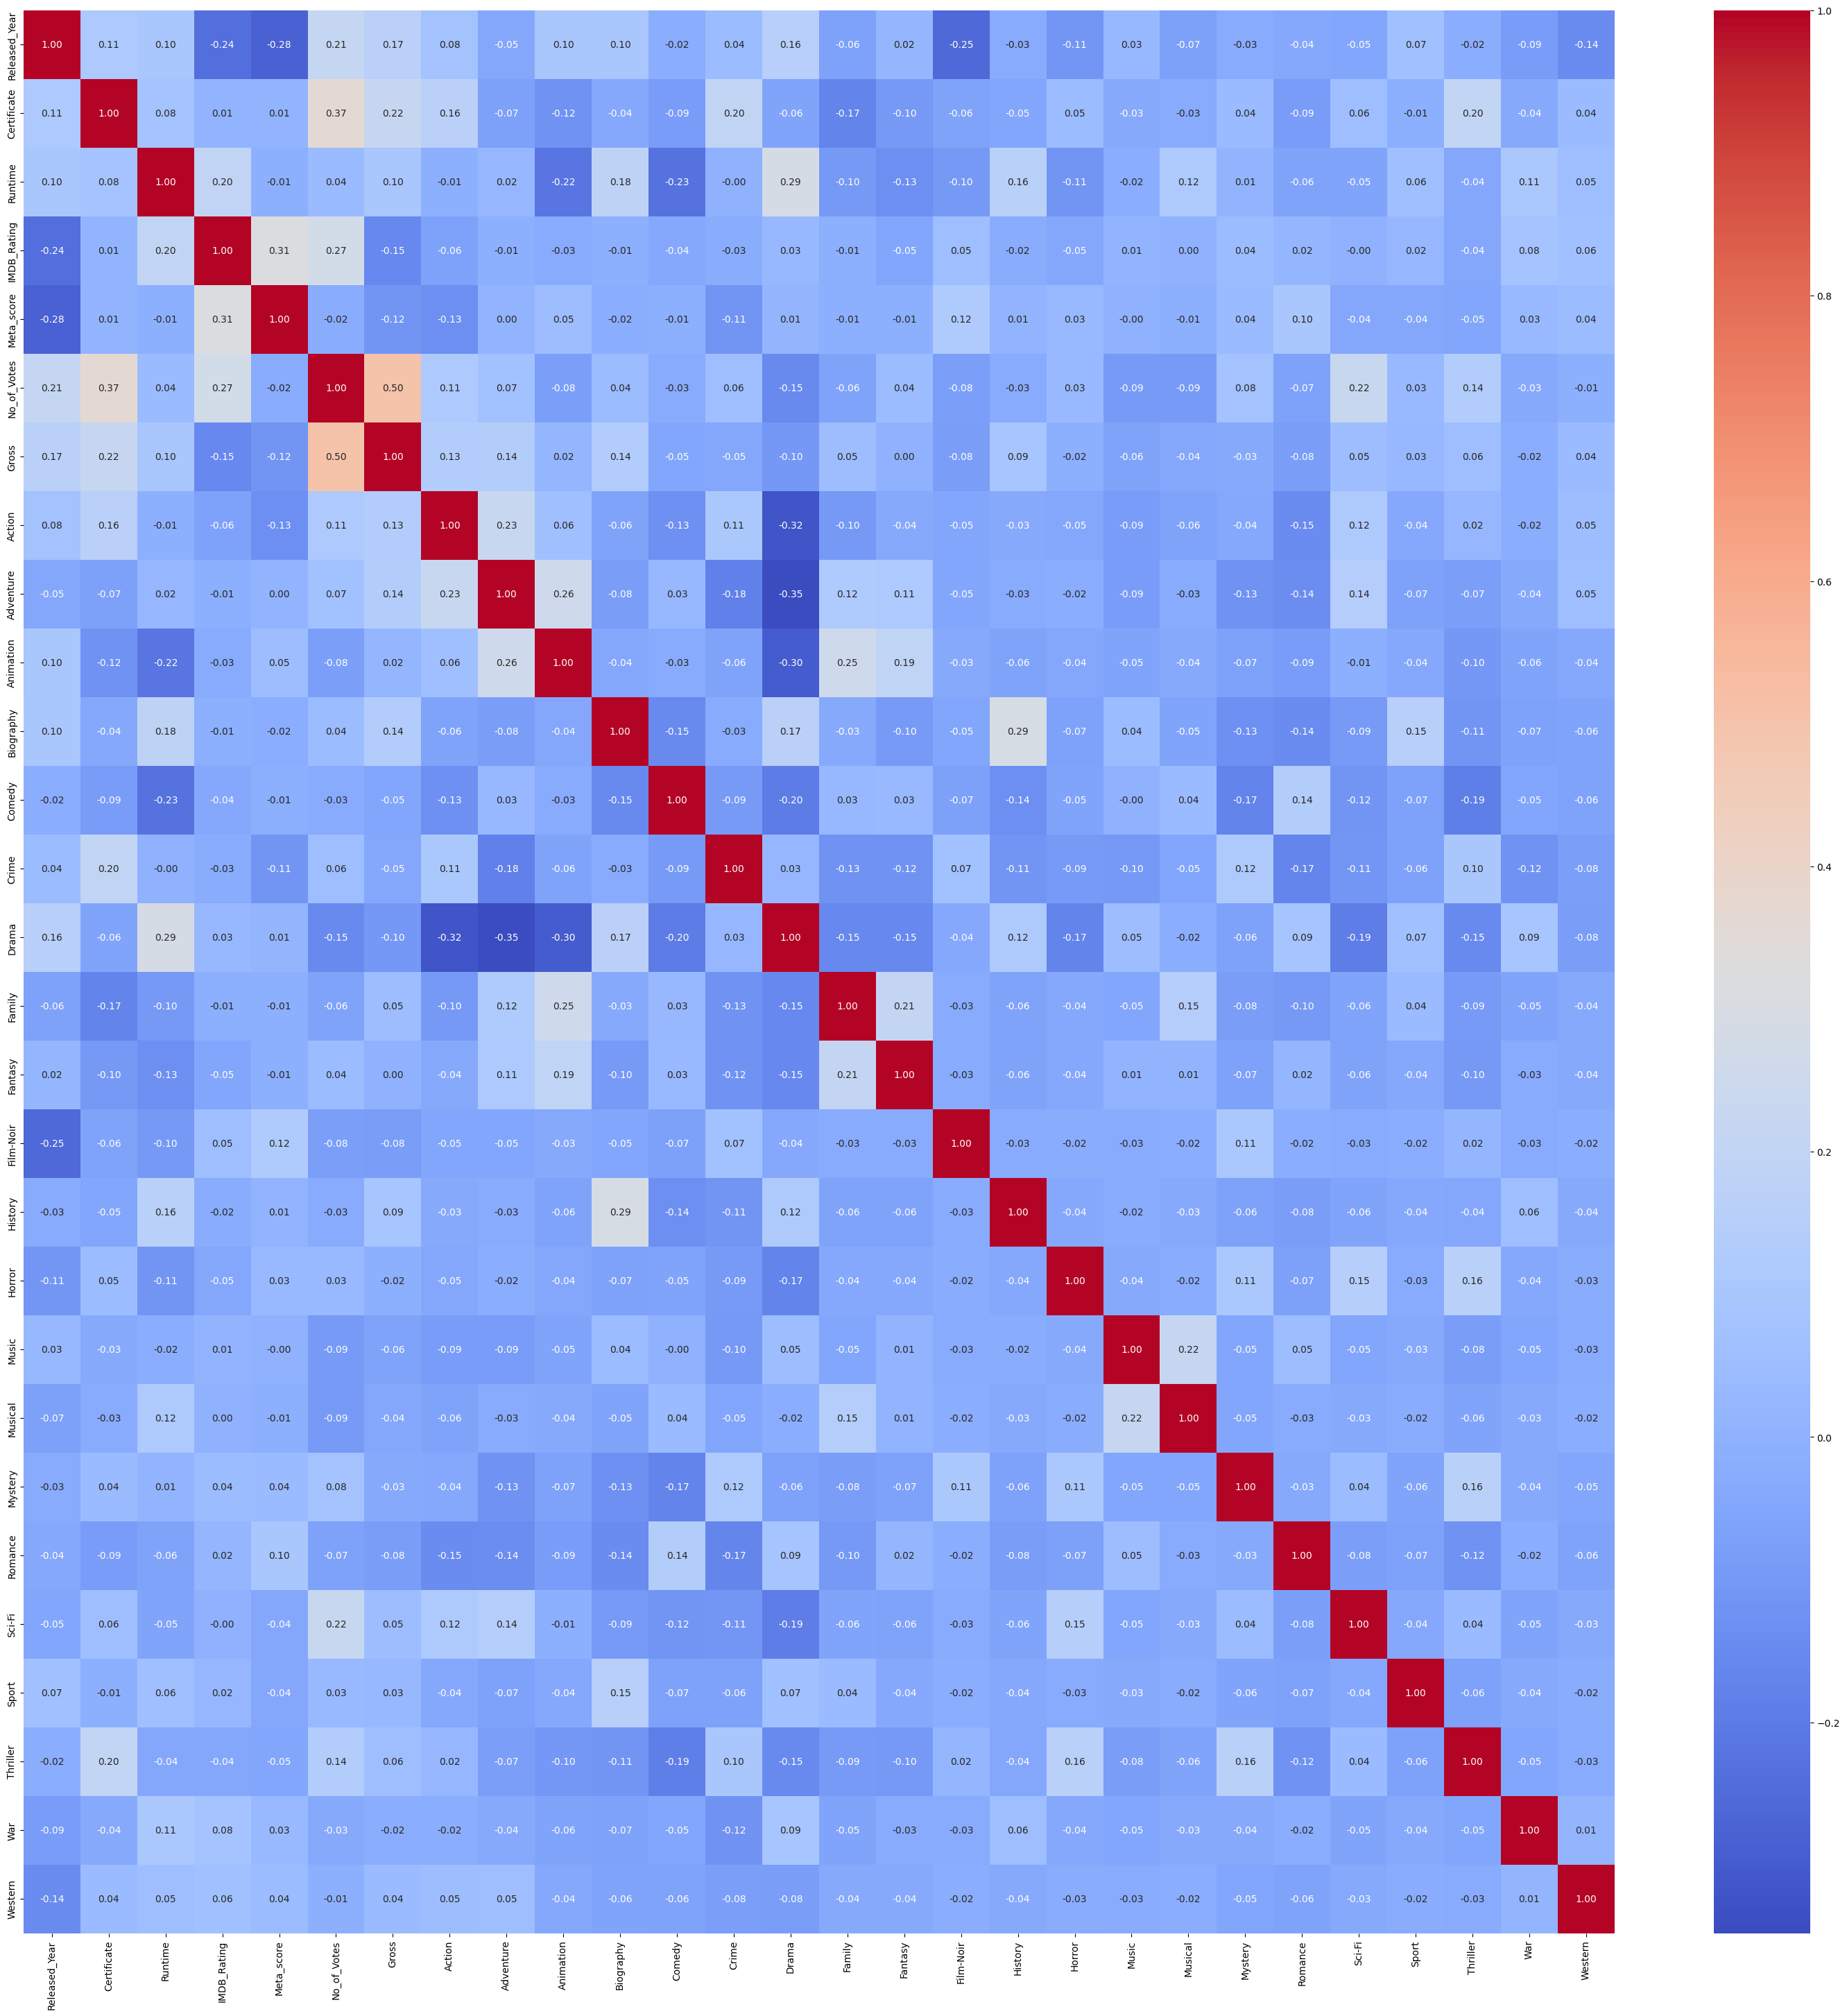

In [20]:
df_copy = df.copy()

df_copy.drop(columns=["Poster_Link","Series_Title","Overview","Director","Star1","Star2","Star3","Star4"], inplace=True)
corr_matrix = df_copy.corr()

plt.figure(figsize=(37,36))

sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")

plt.show()

Happily, we dont have 2 columns for which the correlation is big (>0.7 or >0.8), so we can conclude that all the features offer us useful information.

Let us now remove features that contain **little to no useful information**.
We can do this using a **variance threshold**, but also by our **pure reasoning**, by putting things in perspective.

- we can notice that the **Poster_Link** column brings absolutely no useful information,
because it contains only random values (a link is just a string with random character)
- so by removing this column, we have a higher performance and the model can interpret better the data.


In [21]:
df = df.drop(columns=['Poster_Link'])
print(df.shape)

(705, 35)


In [22]:
df.head(10)

,Series_Title,Released_Year,Certificate,Runtime,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
4,12 Angry Men,-1.614583,0,-0.985624,4.592377,A jury holdout attempts to prevent a miscarria...,1.543382,Sidney Lumet,Henry Fonda,Lee J. Cobb,...,0,0,0,0,0,0,0,0,0,0
12,"Il buono, il brutto, il cattivo",-1.203222,2,1.412753,3.750561,A bounty hunting scam joins two men in an unea...,1.043190,Sergio Leone,Clint Eastwood,Eli Wallach,...,0,0,0,0,0,0,0,0,0,1
19,Gisaengchung,1.219236,2,0.342708,2.908744,Greed and class discrimination threaten the ne...,1.543382,Bong Joon Ho,Kang-ho Song,Lee Sun-kyun,...,0,0,0,0,0,0,0,1,0,0
22,Cidade de Deus,0.442221,2,0.268911,2.908744,"In the slums of Rio, two kids' paths diverge a...",0.126171,Fernando Meirelles,Ktia Lund,Alexandre Rodrigues,...,0,0,0,0,0,0,0,0,0,0
23,Sen to Chihiro no kamikakushi,0.396514,0,0.084421,2.908744,"During her family's move to the suburbs, a sul...",1.543382,Hayao Miyazaki,Daveigh Chase,Suzanne Pleshette,...,0,0,0,0,0,0,0,0,0,0
26,La vita  bella,0.213687,0,-0.247662,2.908744,When an open-minded Jewish librarian and his s...,-1.541135,Roberto Benigni,Roberto Benigni,Nicoletta Braschi,...,0,0,0,0,1,0,0,0,0,0
31,Shichinin no samurai,-1.751703,0,3.110066,2.908744,A poor village under attack by bandits recruit...,1.710112,Akira Kurosawa,Toshir Mifune,Takashi Shimura,...,0,0,0,0,0,0,0,0,0,0
34,Whiplash,0.990702,2,-0.616643,2.487836,A promising young drummer enrolls at a cut-thr...,0.876459,Damien Chazelle,Miles Teller,J.K. Simmons,...,0,1,0,0,0,0,0,0,0,0
35,The Intouchables,0.853582,1,-0.395255,2.487836,After he becomes a quadriplegic from a paragli...,-1.707866,Olivier Nakache,ric Toledano,Franois Cluzet,...,0,0,0,0,0,0,0,0,0,0
38,The Pianist,0.442221,0,1.006873,2.487836,A Polish Jewish musician struggles to survive ...,0.626363,Roman Polanski,Adrien Brody,Thomas Kretschmann,...,0,1,0,0,0,0,0,0,0,0


Let us see the variances for all columns: 

In [23]:
numeric_df = df.select_dtypes(include='number') # select only numerial values
variances = numeric_df.var()
print(variances)

Released_Year    1.001420
Certificate      0.666518
Runtime          1.001420
IMDB_Rating      1.001420
Meta_score       1.001420
No_of_Votes      1.001420
Gross            1.001420
Action           0.125935
Adventure        0.119854
Animation        0.057354
Biography        0.111521
Comedy           0.180275
Crime            0.170966
Drama            0.176467
Family           0.051068
Fantasy          0.054852
Film-Noir        0.015381
History          0.053594
Horror           0.027603
Music            0.042098
Musical          0.019491
Mystery          0.095201
Romance          0.121897
Sci-Fi           0.049799
Sport            0.024915
Thriller         0.116759
War              0.047248
Western          0.020853
dtype: float64


We can remove low-variance columns, as they do not bring any new information that can actually improve the performance of the model.

In [24]:
from sklearn.feature_selection import VarianceThreshold

#select only numeric columns
numeric_cols = df.select_dtypes(include='number').columns

selector = VarianceThreshold(threshold=0.02) # set the treshold
reduced_data = selector.fit_transform(df[numeric_cols]) # save the tranformations in
                                                        # reduced_data after applying the threshold


#get the kept columns( columns that were not affected by threshold)
selected_cols = numeric_cols[selector.get_support()]

#drop all numeric columns
df.drop(columns=numeric_cols, inplace=True)

#concatanate the kept columns by the threshold back to the dataset
reduced_df = pd.DataFrame(reduced_data, columns=selected_cols, index=df.index)
df = pd.concat([df, reduced_df], axis=1)

df.head(10)


,Series_Title,Overview,Director,Star1,Star2,Star3,Star4,Released_Year,Certificate,Runtime,...,History,Horror,Music,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
4,12 Angry Men,A jury holdout attempts to prevent a miscarria...,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,-1.614583,0.0,-0.985624,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,"Il buono, il brutto, il cattivo",A bounty hunting scam joins two men in an unea...,Sergio Leone,Clint Eastwood,Eli Wallach,Lee Van Cleef,Aldo Giuffr,-1.203222,2.0,1.412753,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
19,Gisaengchung,Greed and class discrimination threaten the ne...,Bong Joon Ho,Kang-ho Song,Lee Sun-kyun,Cho Yeo-jeong,Choi Woo-sik,1.219236,2.0,0.342708,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
22,Cidade de Deus,"In the slums of Rio, two kids' paths diverge a...",Fernando Meirelles,Ktia Lund,Alexandre Rodrigues,Leandro Firmino,Matheus Nachtergaele,0.442221,2.0,0.268911,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23,Sen to Chihiro no kamikakushi,"During her family's move to the suburbs, a sul...",Hayao Miyazaki,Daveigh Chase,Suzanne Pleshette,Miyu Irino,Rumi Hiiragi,0.396514,0.0,0.084421,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,La vita  bella,When an open-minded Jewish librarian and his s...,Roberto Benigni,Roberto Benigni,Nicoletta Braschi,Giorgio Cantarini,Giustino Durano,0.213687,0.0,-0.247662,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
31,Shichinin no samurai,A poor village under attack by bandits recruit...,Akira Kurosawa,Toshir Mifune,Takashi Shimura,Keiko Tsushima,Yukiko Shimazaki,-1.751703,0.0,3.110066,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34,Whiplash,A promising young drummer enrolls at a cut-thr...,Damien Chazelle,Miles Teller,J.K. Simmons,Melissa Benoist,Paul Reiser,0.990702,2.0,-0.616643,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35,The Intouchables,After he becomes a quadriplegic from a paragli...,Olivier Nakache,ric Toledano,Franois Cluzet,Omar Sy,Anne Le Ny,0.853582,1.0,-0.395255,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38,The Pianist,A Polish Jewish musician struggles to survive ...,Roman Polanski,Adrien Brody,Thomas Kretschmann,Frank Finlay,Emilia Fox,0.442221,0.0,1.006873,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Step 4. Feature Engineering

- Create new meaningful features using transformations, aggregations, or domain knowledge. 
- Use statistical methods (correlation analysis, feature importance) to validate the impact of new features.
- Explain the rationale behind feature engineering choices.

Let us create **Is_Short_Film** and **Is_Long_Film** features.

In [25]:
df['Is_Short_Film'] = (df['Runtime'] < df['Runtime'].median()).astype(int)
df['Is_Long_Film'] = (df['Runtime'] > df['Runtime'].median()).astype(int)

I created this features because maybe some genre types or certificate types correlate to this features ( for example, maybe a comedy movie may be shorter and an action movie may be longer, or a film for children is shorter than a movie for special categories of people).
Also, it will help us in building the recommender.

And also a **Genre_Count** feature

In [26]:
cols = df.columns
start = cols.get_loc('Gross')
end = cols.get_loc('Is_Short_Film')

# Select the range of columns and sum row-wise (axis=1)
df['Genre_Count'] = df.iloc[:, start+1:end].sum(axis=1)

I thought that the more the genders a movie has, the more audiance it has, resulting in a higher success and maybe a bigger Gross (income).

In [27]:
df.head(10)

,Series_Title,Overview,Director,Star1,Star2,Star3,Star4,Released_Year,Certificate,Runtime,...,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,Is_Short_Film,Is_Long_Film,Genre_Count
4,12 Angry Men,A jury holdout attempts to prevent a miscarria...,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,-1.614583,0.0,-0.985624,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,2.0
12,"Il buono, il brutto, il cattivo",A bounty hunting scam joins two men in an unea...,Sergio Leone,Clint Eastwood,Eli Wallach,Lee Van Cleef,Aldo Giuffr,-1.203222,2.0,1.412753,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1,1.0
19,Gisaengchung,Greed and class discrimination threaten the ne...,Bong Joon Ho,Kang-ho Song,Lee Sun-kyun,Cho Yeo-jeong,Choi Woo-sik,1.219236,2.0,0.342708,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,1,3.0
22,Cidade de Deus,"In the slums of Rio, two kids' paths diverge a...",Fernando Meirelles,Ktia Lund,Alexandre Rodrigues,Leandro Firmino,Matheus Nachtergaele,0.442221,2.0,0.268911,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,2.0
23,Sen to Chihiro no kamikakushi,"During her family's move to the suburbs, a sul...",Hayao Miyazaki,Daveigh Chase,Suzanne Pleshette,Miyu Irino,Rumi Hiiragi,0.396514,0.0,0.084421,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,3.0
26,La vita  bella,When an open-minded Jewish librarian and his s...,Roberto Benigni,Roberto Benigni,Nicoletta Braschi,Giorgio Cantarini,Giustino Durano,0.213687,0.0,-0.247662,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,0,3.0
31,Shichinin no samurai,A poor village under attack by bandits recruit...,Akira Kurosawa,Toshir Mifune,Takashi Shimura,Keiko Tsushima,Yukiko Shimazaki,-1.751703,0.0,3.110066,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,3.0
34,Whiplash,A promising young drummer enrolls at a cut-thr...,Damien Chazelle,Miles Teller,J.K. Simmons,Melissa Benoist,Paul Reiser,0.990702,2.0,-0.616643,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,2.0
35,The Intouchables,After he becomes a quadriplegic from a paragli...,Olivier Nakache,ric Toledano,Franois Cluzet,Omar Sy,Anne Le Ny,0.853582,1.0,-0.395255,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,3.0
38,The Pianist,A Polish Jewish musician struggles to survive ...,Roman Polanski,Adrien Brody,Thomas Kretschmann,Frank Finlay,Emilia Fox,0.442221,0.0,1.006873,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,3.0


It is important not to forget to scale the encoded and engineered columns, as it may affect the performance of the model.

But let us save also the encoded columns in the plot dataset.

In [28]:
scaler = StandardScaler()

start_col = df.columns.get_loc('Gross') + 1  # +1 to skip Gross itself
#select columns after 'Gross'
cols_to_scale = df.columns[start_col:]

df_plot[cols_to_scale] = df[cols_to_scale] # save the encoded columns in the copy dataset before scaling

df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])




In [29]:
df_plot['Certificate']=df['Certificate'] # save before scaling

In [30]:
# scale also the encoded Certificate
scaler_certificate = StandardScaler()
df.loc[:, 'Certificate'] = scaler_certificate.fit_transform(df[['Certificate']])

In [31]:
df.head(5)

,Series_Title,Overview,Director,Star1,Star2,Star3,Star4,Released_Year,Certificate,Runtime,...,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,Is_Short_Film,Is_Long_Film,Genre_Count
4,12 Angry Men,A jury holdout attempts to prevent a miscarria...,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,-1.614583,-0.716326,-0.985624,...,-0.345033,-0.406558,-0.235349,-0.161867,-0.394636,-0.228558,-0.147442,1.021508,-0.987314,-0.665048
12,"Il buono, il brutto, il cattivo",A bounty hunting scam joins two men in an unea...,Sergio Leone,Clint Eastwood,Eli Wallach,Lee Van Cleef,Aldo Giuffr,-1.203222,1.735177,1.412753,...,-0.345033,-0.406558,-0.235349,-0.161867,-0.394636,-0.228558,6.782330,-0.978945,1.012848,-2.068818
19,Gisaengchung,Greed and class discrimination threaten the ne...,Bong Joon Ho,Kang-ho Song,Lee Sun-kyun,Cho Yeo-jeong,Choi Woo-sik,1.219236,1.735177,0.342708,...,-0.345033,-0.406558,-0.235349,-0.161867,2.533980,-0.228558,-0.147442,-0.978945,1.012848,0.738721
22,Cidade de Deus,"In the slums of Rio, two kids' paths diverge a...",Fernando Meirelles,Ktia Lund,Alexandre Rodrigues,Leandro Firmino,Matheus Nachtergaele,0.442221,1.735177,0.268911,...,-0.345033,-0.406558,-0.235349,-0.161867,-0.394636,-0.228558,-0.147442,-0.978945,1.012848,-0.665048
23,Sen to Chihiro no kamikakushi,"During her family's move to the suburbs, a sul...",Hayao Miyazaki,Daveigh Chase,Suzanne Pleshette,Miyu Irino,Rumi Hiiragi,0.396514,-0.716326,0.084421,...,-0.345033,-0.406558,-0.235349,-0.161867,-0.394636,-0.228558,-0.147442,-0.978945,1.012848,0.738721


## CORRELATION ANALYSIS 
- let us see what type of correlation we have now, taking into consideration the new features.

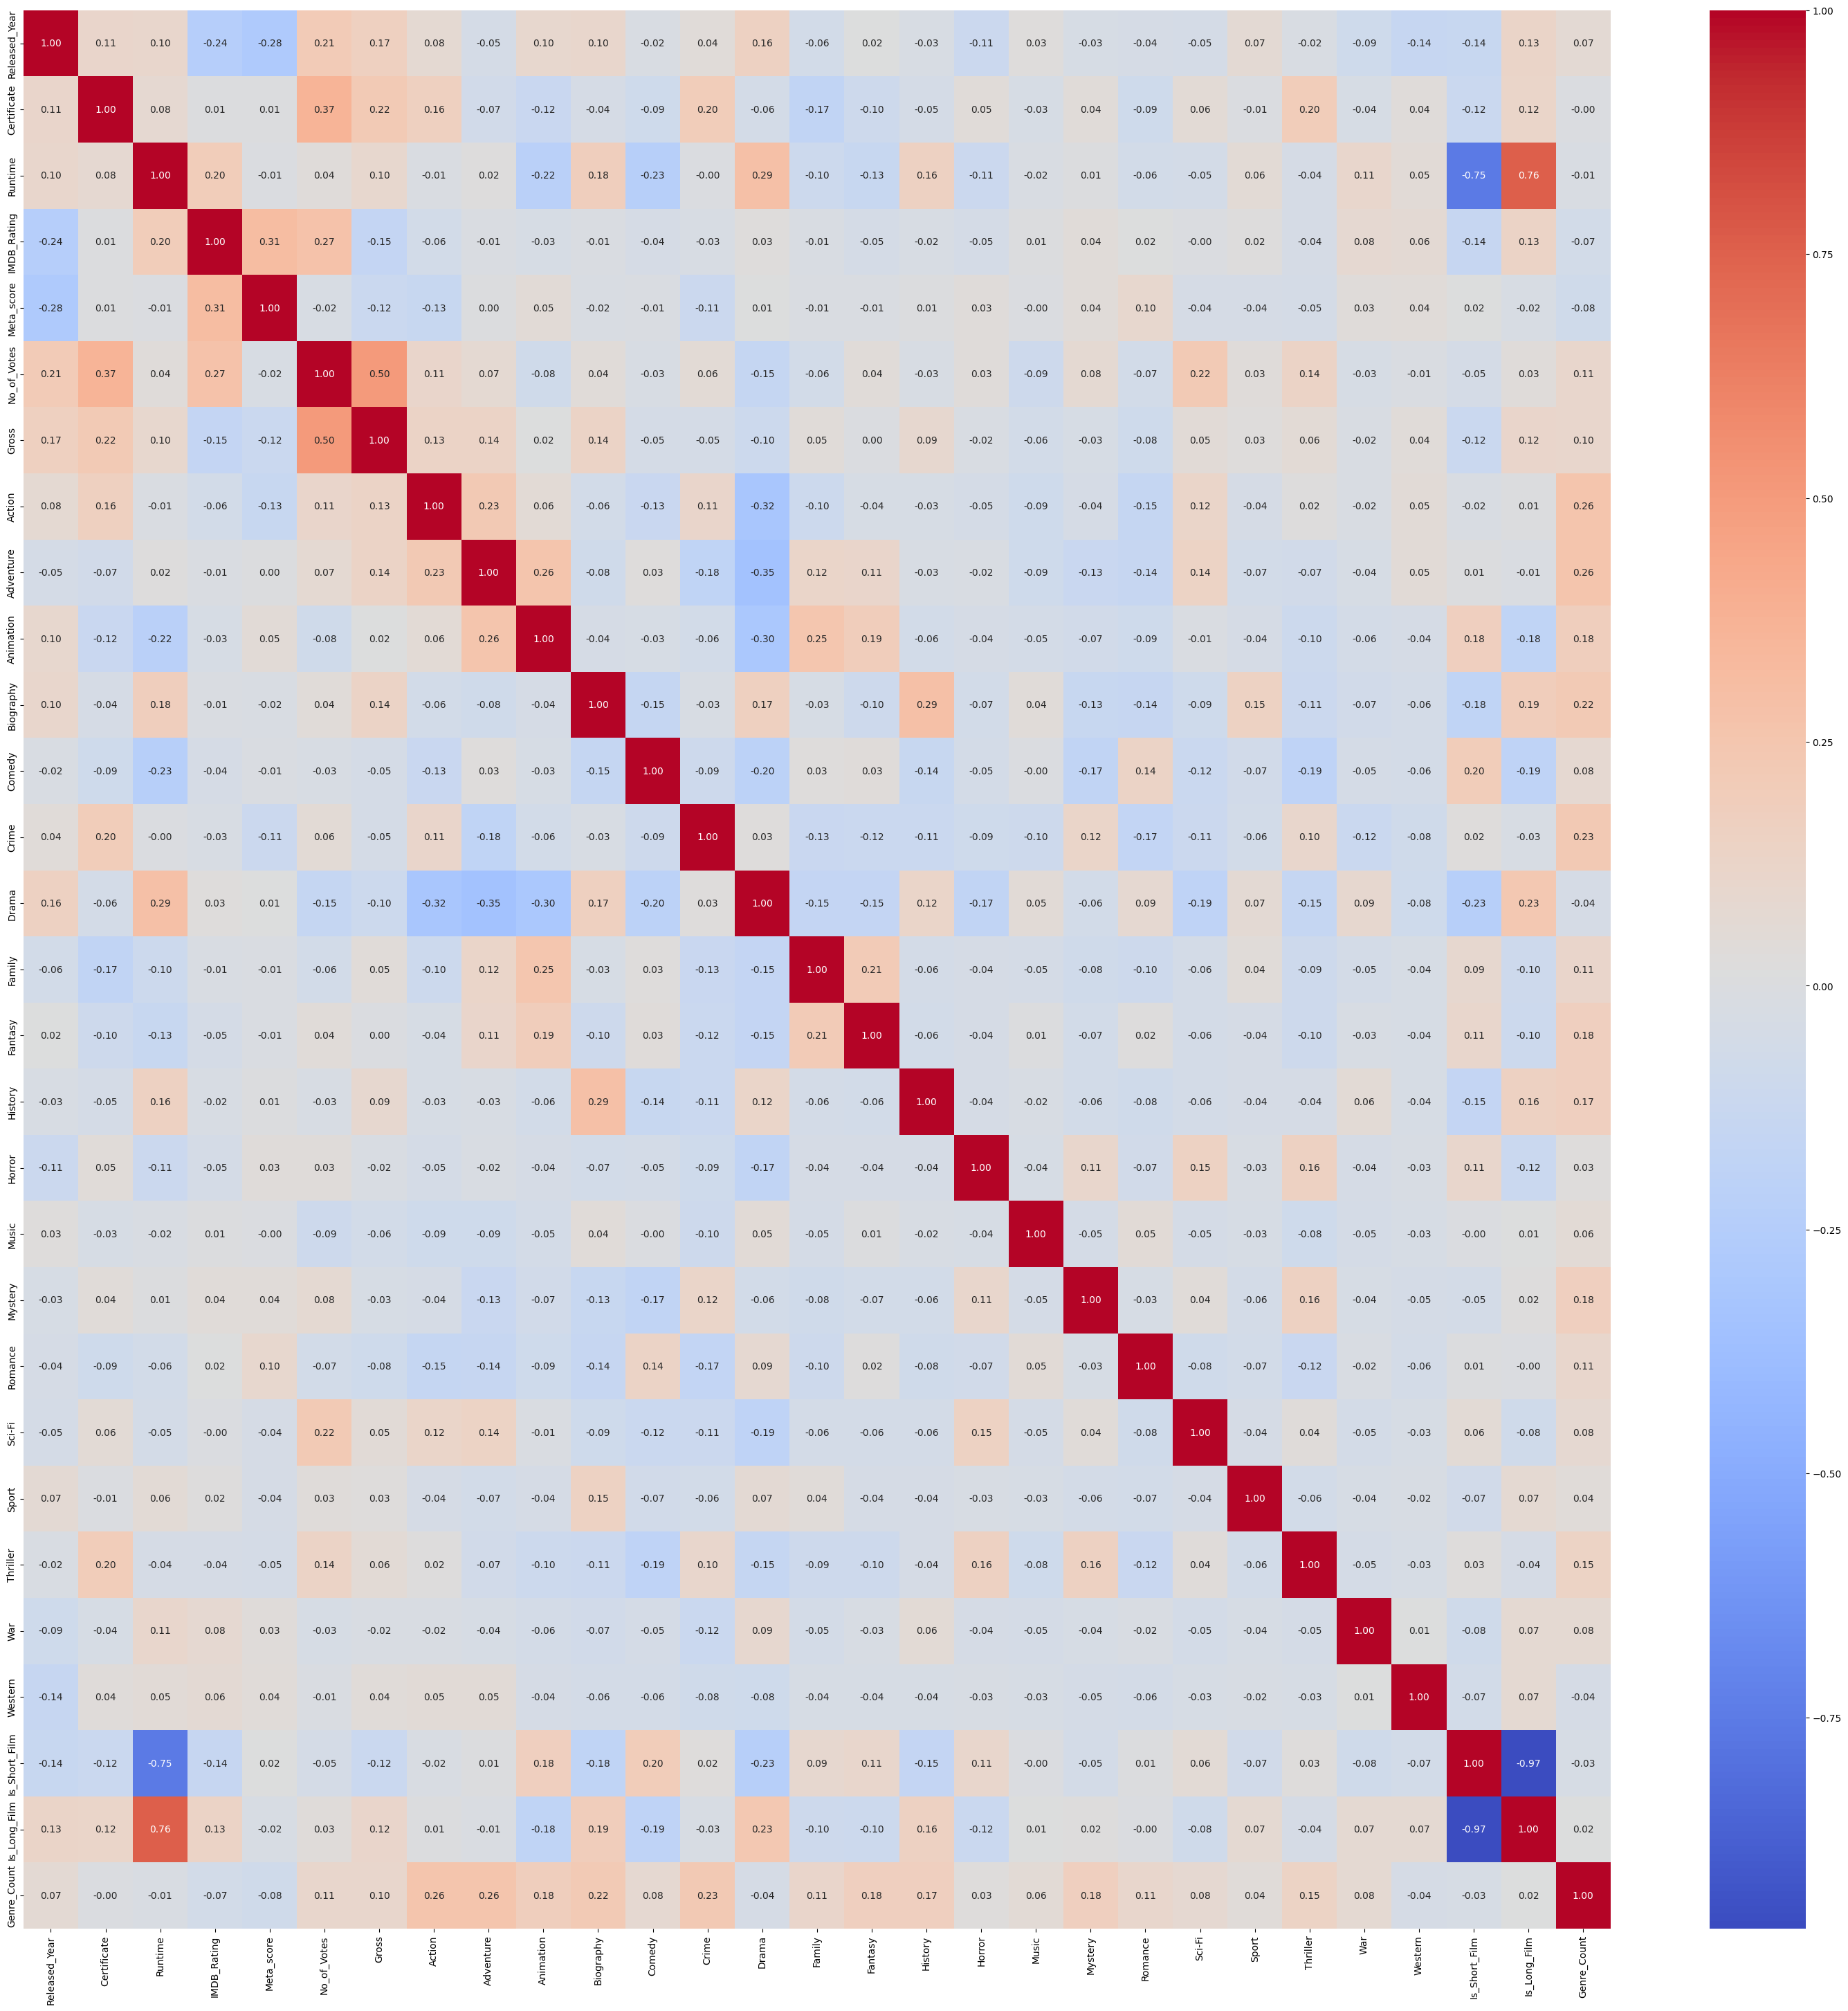

In [32]:
df_copy = df.copy()

df_copy.drop(columns=["Series_Title","Overview","Director","Star1","Star2","Star3","Star4"], inplace=True)
corr_matrix = df_copy.corr()

plt.figure(figsize=(37,36))

sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")

plt.show()

We can notice that:
- there is *Linear Relationship* between **Is_Long_Film** and **Duration** (they are highly correlated)
- **Genre_count** is quite independent, it does not really reflect the success of the movie
- the heatmap is now more "stable" and equilibrated, due to scaling and standardization

## Extracting & Visualizing Insights

- Extract 10 key insights (e.g., trends, distributions, anomalies) from the dataset through data visualization (e.g., histograms, box plots, scatter plots,
heatmaps).
- Justify the choice of each visualization and explain the insight it conveys. Extract interesting (funny, scary, joyful) meaning from the vizualizations and write them down. We will share them with everyone!

Let's se the plot dataset, where we have previosuly saved all the necessary unscaled information.

In [33]:
df_plot.head(10)

,Series_Title_plot,Released_Year_plot,Runtime_plot,IMDB_Rating_plot,Overview,Meta_score_plot,Director_plot,Star1_plot,Star2_plot,Star3_plot,...,Romance,Sci-Fi,Sport,Thriller,War,Western,Is_Short_Film,Is_Long_Film,Genre_Count,Certificate
4,12 Angry Men,1957,96,9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0,2.0,0.0
12,"Il buono, il brutto, il cattivo",1966,161,8.8,A bounty hunting scam joins two men in an unea...,90.0,Sergio Leone,Clint Eastwood,Eli Wallach,Lee Van Cleef,...,0.0,0.0,0.0,0.0,0.0,1.0,0,1,1.0,2.0
19,Gisaengchung,2019,132,8.6,Greed and class discrimination threaten the ne...,96.0,Bong Joon Ho,Kang-ho Song,Lee Sun-kyun,Cho Yeo-jeong,...,0.0,0.0,0.0,1.0,0.0,0.0,0,1,3.0,2.0
22,Cidade de Deus,2002,130,8.6,"In the slums of Rio, two kids' paths diverge a...",79.0,Fernando Meirelles,Ktia Lund,Alexandre Rodrigues,Leandro Firmino,...,0.0,0.0,0.0,0.0,0.0,0.0,0,1,2.0,2.0
23,Sen to Chihiro no kamikakushi,2001,125,8.6,"During her family's move to the suburbs, a sul...",96.0,Hayao Miyazaki,Daveigh Chase,Suzanne Pleshette,Miyu Irino,...,0.0,0.0,0.0,0.0,0.0,0.0,0,1,3.0,0.0
26,La vita  bella,1997,116,8.6,When an open-minded Jewish librarian and his s...,59.0,Roberto Benigni,Roberto Benigni,Nicoletta Braschi,Giorgio Cantarini,...,1.0,0.0,0.0,0.0,0.0,0.0,1,0,3.0,0.0
31,Shichinin no samurai,1954,207,8.6,A poor village under attack by bandits recruit...,98.0,Akira Kurosawa,Toshir Mifune,Takashi Shimura,Keiko Tsushima,...,0.0,0.0,0.0,0.0,0.0,0.0,0,1,3.0,0.0
34,Whiplash,2014,106,8.5,A promising young drummer enrolls at a cut-thr...,88.0,Damien Chazelle,Miles Teller,J.K. Simmons,Melissa Benoist,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0,2.0,2.0
35,The Intouchables,2011,112,8.5,After he becomes a quadriplegic from a paragli...,57.0,Olivier Nakache,ric Toledano,Franois Cluzet,Omar Sy,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0,3.0,1.0
38,The Pianist,2002,150,8.5,A Polish Jewish musician struggles to survive ...,85.0,Roman Polanski,Adrien Brody,Thomas Kretschmann,Frank Finlay,...,0.0,0.0,0.0,0.0,0.0,0.0,0,1,3.0,0.0


Let us see how many movies of the dataset have the average Runtime.

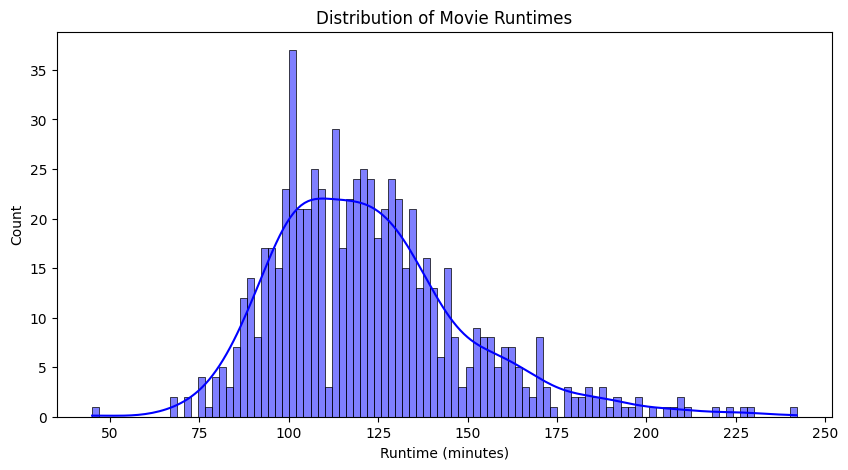

In [34]:
plt.figure(figsize=(10,5))
sns.histplot(df_plot['Runtime_plot'], bins=100, kde=True, color='blue')

plt.title('Distribution of Movie Runtimes')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Count')
plt.show()

We can deduce that the **Runtime** of the movies has a *Normal Distribution*, meaning that most values are "average".

What is the average score of the movies?

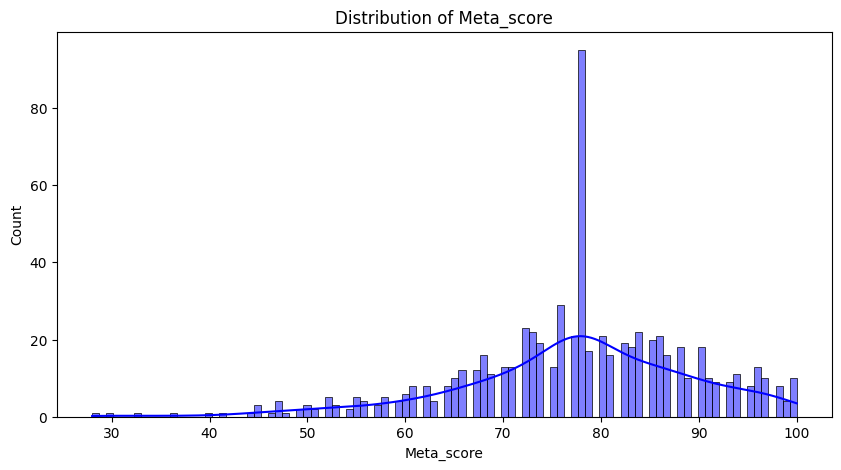

In [35]:
plt.figure(figsize=(10,5))
sns.histplot(df_plot['Meta_score_plot'], bins=100, kde=True, color='blue')

plt.title('Distribution of Meta_score')
plt.xlabel('Meta_score')
plt.ylabel('Count')
plt.show()

Very interesting: most of the movies have the grade 7,7 or 7,8 and there is a normal distribution behaviour around this value.

How many genres does a movie has (on average)?

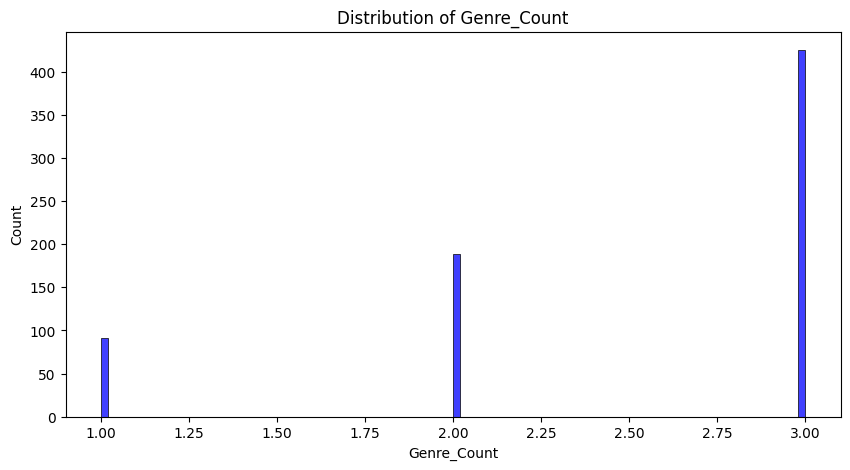

In [36]:
plt.figure(figsize=(10,5))
sns.histplot(df_plot['Genre_Count'], bins=100, color='blue')

plt.title('Distribution of Genre_Count')
plt.xlabel('Genre_Count')
plt.ylabel('Count')
plt.show()

Seems like most of the movies have 3 genres.

Is there a correlation between the certificate type and the number of votes?

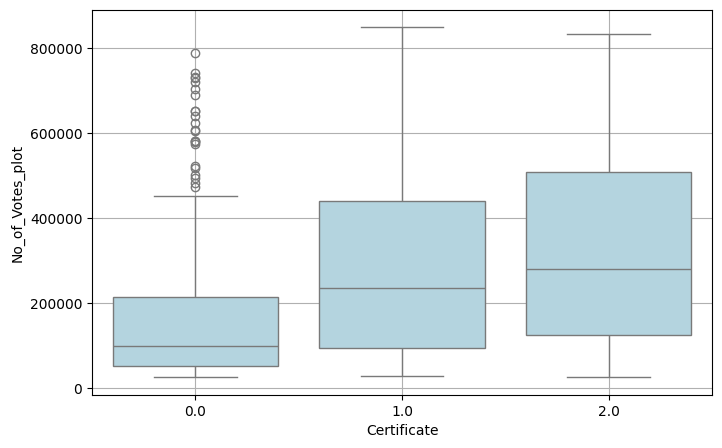

In [37]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_plot['Certificate'], y=df_plot['No_of_Votes_plot'], color='lightblue')

plt.grid(True)
plt.show()

We can deduce that, for movies destined to adolescents, adults and special categories, the number of votes is uniform.
But, it is expected that the nr of votes for a few of more general movies (family-friendly) is really high.

What are the best years with the best movies? (considering average IMDB_Rating)

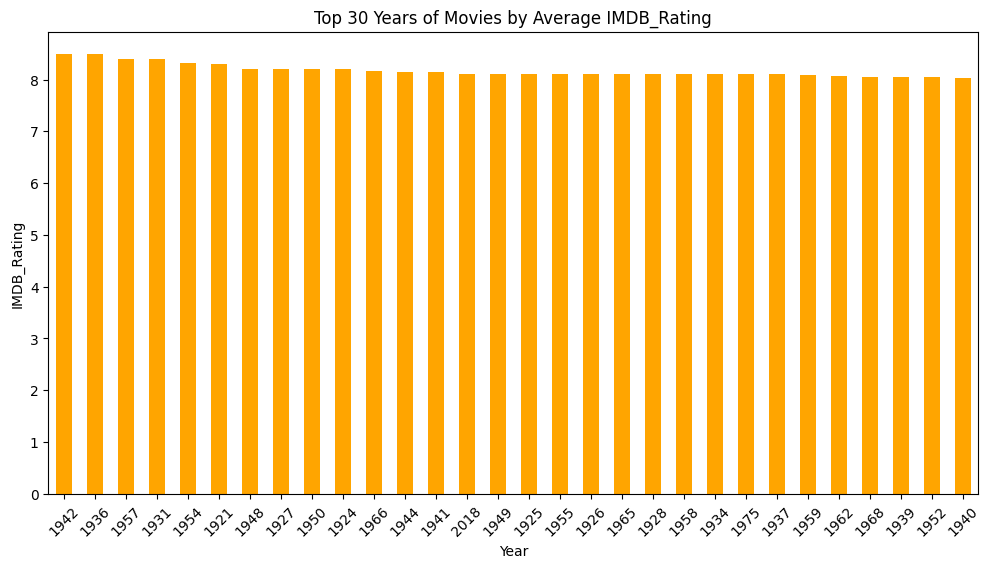

In [38]:
year_IMDB_Rating = df_plot.groupby('Released_Year_plot')['IMDB_Rating_plot'].mean().sort_values(ascending=False)

plt.figure(figsize=(12,6))
year_IMDB_Rating.head(30).plot(kind='bar', color='orange')
plt.title('Top 30 Years of Movies by Average IMDB_Rating')
plt.xlabel('Year')
plt.ylabel('IMDB_Rating')
plt.xticks(rotation=45)
plt.show()

What are the years with the worst movies? (considering average Meta_score)

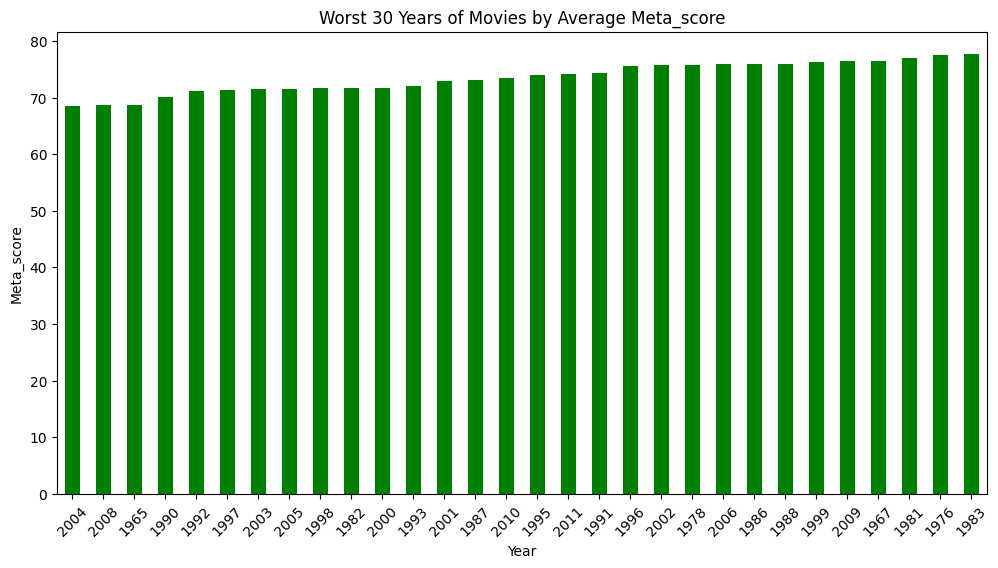

In [39]:
year_Meta_score = df_plot.groupby('Released_Year_plot')['Meta_score_plot'].mean().sort_values(ascending=True)

plt.figure(figsize=(12,6))
year_Meta_score.head(30).plot(kind='bar', color='green')
plt.title('Worst 30 Years of Movies by Average Meta_score')
plt.xlabel('Year')
plt.ylabel('Meta_score')
plt.xticks(rotation=45)
plt.show()

It seems like the older movies are more qualitative then the newer ones...

Do the short films or the long films generate more Gross?

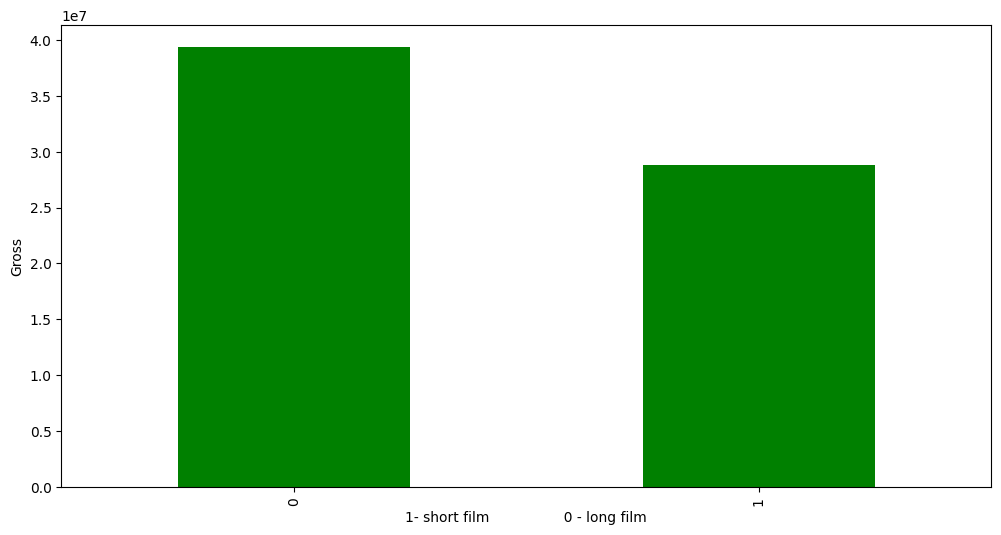

In [40]:
length_Gross = df_plot.groupby('Is_Short_Film')['Gross_plot'].mean()

plt.figure(figsize=(12,6))
length_Gross.plot(kind='bar', color='green')
plt.xlabel('1- short film                 0 - long film')
plt.ylabel('Gross')
plt.show()

It seems like longer films are much more profitable, but of course, if we tink it through, they are also more expensive to produce.

Have the movies become shorter in the last years? Let us see this through a scatter plot.

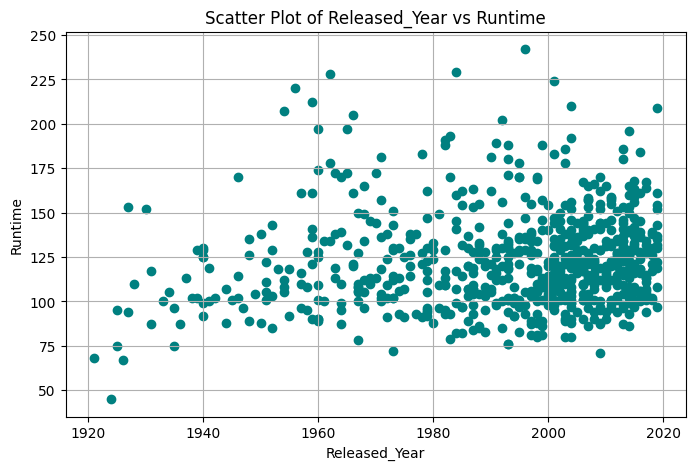

In [41]:
plt.figure(figsize=(8, 5))
plt.scatter(df_plot['Released_Year_plot'], df_plot['Runtime_plot'], color='teal')
plt.title('Scatter Plot of Released_Year vs Runtime')
plt.xlabel('Released_Year')
plt.ylabel('Runtime')
plt.grid(True)
plt.show()

We cannot draw any conclusions, only that we have much more data from 1980 onwards. 

Have the movies in the last years been more family-friendly or not?

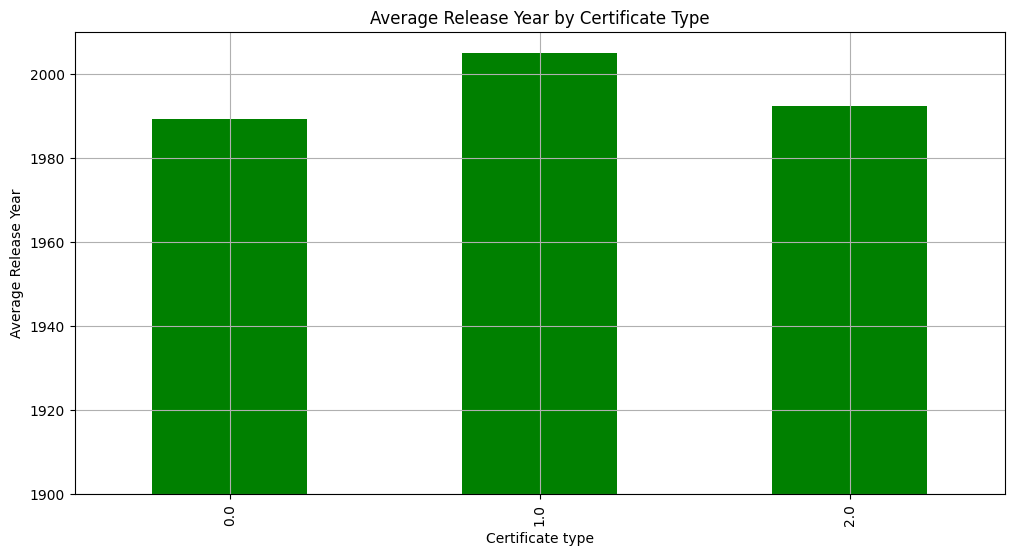

In [42]:
# Filter years >= 1900
filtered_df = df_plot[df_plot['Released_Year_plot'] >= 1900]

# Group and calculate mean year by certificate
certificate_year = filtered_df.groupby('Certificate')['Released_Year_plot'].mean()

plt.figure(figsize=(12,6))
certificate_year.plot(kind='bar', color='green')

plt.xlabel('Certificate type')
plt.ylabel('Average Release Year')
plt.title('Average Release Year by Certificate Type')
plt.ylim(1900, certificate_year.max() + 5)  # y-axis from 1900 up
plt.grid(True)
plt.show()

It seems like in the recent years there are more movies destined to 12+ kids and adults.

Let us see if the Family category attracts more votes.

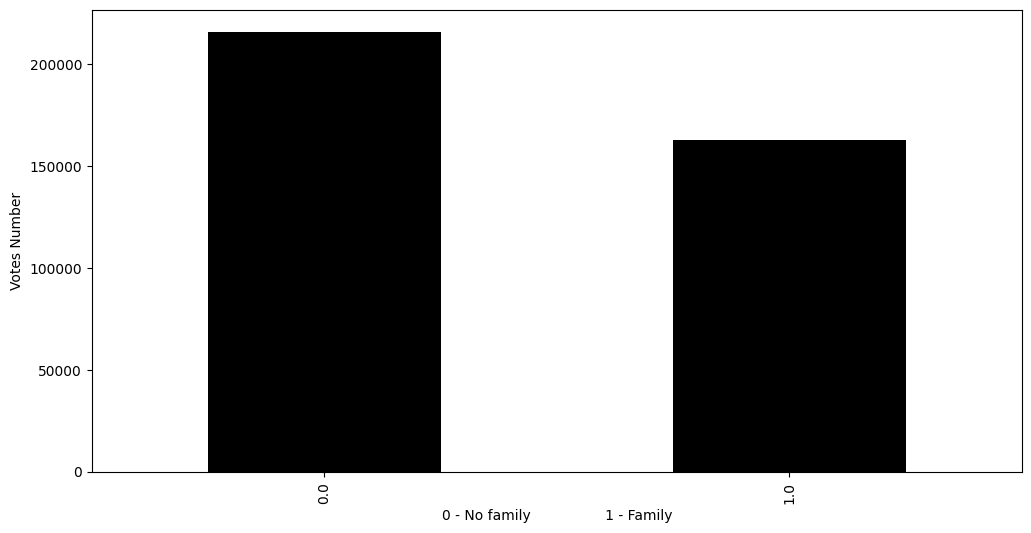

In [43]:
family_nr_votes = df_plot.groupby('Family')['No_of_Votes_plot'].mean()

plt.figure(figsize=(12,6))
family_nr_votes.plot(kind='bar', color='black')
plt.xlabel('0 - No family                 1 - Family')
plt.ylabel('Votes Number')
plt.show()

Unexpectedly, the movies that are NOT in this category have more votes.

## Some final dimension reduction (not helpful if we need Linear Regression afterwards) - DO NOT RUN IF YOU DO NOT NEED IT

Finally, let us apply some dimensionaliy reduction, becuase this way we can help the model **run faster and prevent overfitting**.

PCA reduces the number of features while keeping most of the dataset's variance.
Let us just keep 95% of the variance and get rid of unnecessary columns, that do not differ from others so much, so they do not bring any advantage and they just reduce the performance.
The problem is that PCA transforms the features into a new set of orthogonal (i.e., uncorrelated) components. So this does not help if we want to apply Linear Regression for example, after data processing.

In [44]:
from sklearn.decomposition import PCA

#select numeric columns
numeric_cols = df.select_dtypes(include='number').columns
non_numeric_df = df.select_dtypes(exclude='number')

pca = PCA(n_components=0.95)  # Keep enough components to explain 95% of variance
df_pca_array = pca.fit_transform(df[numeric_cols]) # save the tranformations in
                                             # df_pca after applying the pca operation

# Convert PCA result to DataFrame
df_pca = pd.DataFrame(df_pca_array,
                      columns=[f'PC{i+1}' for i in range(pca.n_components_)],
                      index=df.index)
df = pd.concat([df_pca, non_numeric_df], axis=1)

df.head(10)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC22,PC23,PC24,Series_Title,Overview,Director,Star1,Star2,Star3,Star4
4,-0.770670,-0.772740,-2.034184,2.624444,0.564704,1.681482,2.169178,-2.589747,-1.969936,-0.819379,...,-0.593276,-0.965152,-0.497730,12 Angry Men,A jury holdout attempts to prevent a miscarria...,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler
12,2.018268,0.450113,-1.232824,5.670180,2.470298,-0.268356,-1.307863,-2.527081,-1.918646,-0.133358,...,-0.137961,-0.130458,0.593395,"Il buono, il brutto, il cattivo",A bounty hunting scam joins two men in an unea...,Sergio Leone,Clint Eastwood,Eli Wallach,Lee Van Cleef,Aldo Giuffr
19,1.680726,1.226071,-1.329524,1.501444,1.823010,0.604166,2.265303,-0.668714,-0.054109,0.302375,...,-0.819232,1.223181,-0.690074,Gisaengchung,Greed and class discrimination threaten the ne...,Bong Joon Ho,Kang-ho Song,Lee Sun-kyun,Cho Yeo-jeong,Choi Woo-sik
22,2.076977,0.837304,-1.712732,1.060544,1.393556,-0.012802,1.562090,-2.188812,-0.685900,-0.524516,...,-0.760079,-0.848909,0.473969,Cidade de Deus,"In the slums of Rio, two kids' paths diverge a...",Fernando Meirelles,Ktia Lund,Alexandre Rodrigues,Leandro Firmino,Matheus Nachtergaele
23,-0.739192,1.702141,3.926397,3.707165,-0.164482,0.409335,1.996690,-2.950445,1.322394,-0.581202,...,-1.038754,-0.239757,0.217043,Sen to Chihiro no kamikakushi,"During her family's move to the suburbs, a sul...",Hayao Miyazaki,Daveigh Chase,Suzanne Pleshette,Miyu Irino,Rumi Hiiragi
26,-0.851332,-0.334221,-0.271851,0.149363,2.643378,0.661777,2.452308,0.884925,-0.593105,-0.075522,...,-0.735374,-0.726134,0.537590,La vita  bella,When an open-minded Jewish librarian and his s...,Roberto Benigni,Roberto Benigni,Nicoletta Braschi,Giorgio Cantarini,Giustino Durano
31,2.277910,0.404423,1.278429,4.047873,-0.875833,-0.862634,0.670581,-0.243209,-1.359307,-1.583193,...,-1.505598,0.418280,-0.037303,Shichinin no samurai,A poor village under attack by bandits recruit...,Akira Kurosawa,Toshir Mifune,Takashi Shimura,Keiko Tsushima,Yukiko Shimazaki
34,-0.228775,-0.156982,-1.480452,0.447966,2.400546,1.748298,1.540880,-0.502674,-0.519862,-2.412228,...,-1.666574,-0.201124,0.414397,Whiplash,A promising young drummer enrolls at a cut-thr...,Damien Chazelle,Miles Teller,J.K. Simmons,Melissa Benoist,Paul Reiser
35,-0.137779,0.750982,-0.110843,-0.922548,1.892968,2.178773,1.496256,-0.491997,-1.353034,-0.600786,...,-0.028524,1.004541,1.937332,The Intouchables,After he becomes a quadriplegic from a paragli...,Olivier Nakache,ric Toledano,Franois Cluzet,Omar Sy,Anne Le Ny
38,2.724340,-0.198632,0.720657,0.474105,0.921752,2.334818,2.043835,0.156661,-0.333187,-3.121745,...,0.466629,0.519331,-0.035101,The Pianist,A Polish Jewish musician struggles to survive ...,Roman Polanski,Adrien Brody,Thomas Kretschmann,Frank Finlay,Emilia Fox


We can now see that we have 29 columns only, so the model will perform much better, because the importance of the features is distributed more equally.

## Step 3 . Movie Recommendation System (Without AI) 

You need build a content-based movie recommendation logic using only similar metrics, without AI or ML models. Instead of training an algorithm, you must use
feature similarity to recommend movies - as a function that given a movie title will return back Top 5 most similar movies. It is at your imagination to come with a
solution and argument why you thinks it fits the best as a recommendation logic.


I thought that the best solution would be to see how many occurances each word from the title has in the (description + title) of each movie, because the more the word is mentioned, the more the movie will emphasize that idea and will take advantage of the information given by the user.
We basically keep <k,v> pairs of <nr_occurances_word, movie_titles> and sort at the end descending, by key(nr_occurances_word), so as to get the first n movies with the most occurances of words from the title provided.
Moreover, when checking each word, we exclude those from the "common_linking_words" array, because they do not bring any value. Also, just to be safe, we keep at most 5 negative keys to store movie titles that may fill the spot in our "top n" array (maybe our algorithm found only 3 movies, so we need to fill the spot with some other values).

In [44]:
def recommend_top_n_movies(given_movie_title,common_linking_words,n):
    
    words_given_array = given_movie_title.split() # get all the words form the title given as param.

    title_occurences_dict = {} # <k,v> pairs

    negative_n = -n # key index for the remaining spots

    
    for title,overview in zip(df['Series_Title'],df['Overview']):
        search_space_string = title +" "+ overview

        nr_of_appearences_given_movie_title = 0
        search_space_string = search_space_string.lower()    # take in consideration upper case and lower case - it does not matter
        
        for word in words_given_array:
            if word not in common_linking_words:
                nr_of_appearences_given_movie_title += search_space_string.count(word.lower())  # count the words occurances, for each word in provided
                
        #print(nr_of_appearences_given_movie_title)
        if nr_of_appearences_given_movie_title>0:     # if the word has appeared, add it to the multimap(dictionary)
            if nr_of_appearences_given_movie_title not in title_occurences_dict:
                title_occurences_dict[nr_of_appearences_given_movie_title]=[title] 
            else:
                title_occurences_dict[nr_of_appearences_given_movie_title].append(title)                                                                     
        else:
            if negative_n<0: 
                title_occurences_dict[negative_n]=[title]  # if not and the "safety" index is still negative, add to the dictionary
                negative_n = negative_n+1

    #sort dictionary by keys in descending order and flatten the list of titles
    sorted_titles = []
    for key in sorted(title_occurences_dict.keys(), reverse=True):
        sorted_titles.extend(title_occurences_dict[key])  # flatten all matching titles

    return sorted_titles[:n]  # return top n titles only
    

common_linking_words = [
    # Prepositions
    "at", "in", "on", "to", "from", "with", "about", "for", "of", "by",
    "over", "under", "into", "after", "before", "between", "around",
    "through", "during", "without",

    # Coordinating Conjunctions (FANBOYS)
    "for", "and", "nor", "but", "or", "yet", "so",

    # Subordinating Conjunctions
    "because", "although", "since", "if", "when", "while", "unless",
    "until", "even though", "as",

    #other
    'a','an','the'
    
]
print(recommend_top_n_movies("nasa",common_linking_words,5))

['Hidden Figures', 'Apollo 13', 'Sen to Chihiro no kamikakushi', 'Cidade de Deus', 'Gisaengchung']


Let us save the processed data in a csv file

In [46]:
df.to_csv('imdb_top_1000_processed.csv', index=False)